# Slicing SST1 RSoXS Data

## Imports

In [1]:
## The autoreload IPython magic command reloads all modules before code is ran
%load_ext autoreload
%autoreload

In [2]:
## Imports
import PyHyperScattering as phs
import pathlib
import sys
# import tifftools
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib_inline.backend_inline import set_matplotlib_formats

sys.path.append('/nsls2/users/alevin/local_lib')
from andrew_rsoxs_fxns import *
from andrew_loaded_rsoxs import *

## Some setup functions
# set_matplotlib_formats('svg')
# c = from_profile('rsoxs')
print(f'Using PyHyperScattering Version: {phs.__version__}')
# rsoxsload = phs.load.SST1RSoXSDB(corr_mode='None', use_chunked_loading=True)  # initialize rsoxs databroker loader w/ Dask

## Define masks directory path
userPath = pathlib.Path('/nsls2/users/alevin')
notebookPath = pathlib.Path.cwd()
maskPath = userPath.joinpath('masks')
jsonPath = userPath.joinpath('local_lib')
propPath = pathlib.Path('/nsls2/data/sst/proposals/2022-2/pass-309180')
# zarrPath = propPath.joinpath('zarr_datasets_nov2021')
zarrPath = propPath.joinpath('zarr_datasets_jul2022')
exportPath = propPath.joinpath('processed_data')

## Set an RSoXS colormap for later
cm = plt.cm.terrain.copy()
cm.set_bad('purple')

/nsls2/users/alevin/repos/pyhyper_toneygroup_fork/PyHyperScattering/src/PyHyperScattering/load.py:1: UserWarning: Could not import astropy.io.fits, needed for ALS 11.0.1.2 RSoXS loading.  Is this dependency installed?
  from PyHyperScattering.ALS11012RSoXSLoader import ALS11012RSoXSLoader


Imports failed.  Are you running on a machine with proper libraries for databroker, tiled, etc.?


/nsls2/users/alevin/repos/pyhyper_toneygroup_fork/PyHyperScattering/src/PyHyperScattering/integrate.py:3: UserWarning: Could not import CuPy or ndigpu.  If you expect this machine to support CuPy, check dependencies.  Falling back to scikit-image/numpy CPU integration.
  from PyHyperScattering.WPIntegrator import WPIntegrator
/nsls2/users/alevin/repos/pyhyper_toneygroup_fork/PyHyperScattering/src/PyHyperScattering/util.py:4: UserWarning: Could not import package for interactive integration utils.  Install holoviews and scikit-image.
  from PyHyperScattering import IntegrationUtils


Using PyHyperScattering Version: 0+untagged.470.gf7651d5.dirty


## Load DataArrays 

In [4]:
### Instantiate loaded_rsoxs objects
andrew1 = loaded_rsoxs('andrew1', zarrPath)
andrew4 = loaded_rsoxs('andrew4', zarrPath)
andrew7 = loaded_rsoxs('andrew7', zarrPath)
andrew10 = loaded_rsoxs('andrew10', zarrPath)
andrew11 = loaded_rsoxs('andrew11', zarrPath)

## Intensity Plots

### 1. Tiff stacks of qxqy detector images & qchi converted images

In [ ]:
### Load energy lists for facet plots
energies = andrew1.raw_waxs.energy.data
resonant_energies = energies[16:96]

gif_energies = np.array([])
gif_energies = np.append(energies[0:16:3], energies[-31::2])
gif_energies = np.sort(np.append(gif_energies, resonant_energies))

# #### View facet plot to verify data:
# pol=90
# facet_energies = gif_energies[:-6:6]  # should select 16 energies ranging from 270 to 303 eV

# andrew1.integ_waxs.sel(pol=pol, energy=gif_energies[:-6:6], method='nearest').plot.imshow(xscale='log', xlim=(1e-2, 2e-1),
#                 norm=LogNorm(1e1, 5e3), cmap=cm, interpolation='antialiased', col='energy', col_wrap=4)
# integ_saxs.sel(pol=pol, energy=gif_energies[:-6:6], method='nearest').plot.imshow(xscale='log', xlim=(1e-3, 1e-2),
#                 norm=LogNorm(1e1, 5e3), cmap=cm, interpolation='antialiased', col='energy', col_wrap=4)

# raw_waxs.sel(pol=pol, energy=gif_energies[:-6:6], method='nearest').plot.imshow(x='qx', y='qy',
#                 norm=LogNorm(1e1, 5e3), cmap=cm, interpolation='antialiased', col='energy', col_wrap=4)
# raw_saxs.sel(pol=pol, energy=gif_energies[:-6:6], method='nearest').plot.imshow(x='qx', y='qy',
#                 norm=LogNorm(1e1, 5e3), cmap=cm, interpolation='antialiased', col='energy', col_wrap=4)


In [ ]:
# andrew1.build_tiff_stack(gif_energies, exportPath)

In [ ]:
# ### Cell used to batch process Jul2022 tiffs:
# zarrPath = propPath.joinpath('rsoxs_full/rsoxs_analysis/zarr_datasets')

# ### Loop over all sample ids:
# for sample_name in sample_guide:
#     if len([f.name for f in list(exportPath.joinpath('tiff_stacks').glob(f'*_{sample_name}_*'))])==8:
#         print(f'Already made 8 tiff stacks for {sample_name}! Moving on...')
#     else:
#         try:
#             raw_saxs = xr.open_zarr(sorted(zarrPath.glob(f'raw*_{sample_name}_*SAXS*'))[0]).saxs
#             raw_waxs = xr.open_zarr(sorted(zarrPath.glob(f'raw*_{sample_name}_*WAXS*'))[0]).waxs
#             integ_saxs = xr.open_zarr(sorted(zarrPath.glob(f'integ*_{sample_name}_*SAXS*'))[0]).saxs
#             integ_waxs = xr.open_zarr(sorted(zarrPath.glob(f'integ*_{sample_name}_*WAXS*'))[0]).waxs

#             print(f'Moving onto sample {sample_name}: {raw_saxs.blend_name}...')

#             ### Load energy lists for facet plots
#             energies = raw_waxs.energy.data
#             resonant_energies = energies[16:96]

#             gif_energies = np.array([])
#             gif_energies = np.append(energies[0:16:3], energies[-31::2])
#             gif_energies = np.sort(np.append(gif_energies, resonant_energies))

#             ### Build tiff stack
#             build_tiff_stack([raw_saxs, raw_waxs, integ_saxs, integ_waxs], gif_energies, exportPath)
#             print(f'Done making the *8* tiff stacks for {sample_name}: {raw_saxs.blend_name}!')
#         except IndexError:
#             print(f'Oops! There is no zarr file for {sample_name} yet! Moving on...')

### 2. ISI Plots

In [ ]:
### Checking functionality of chi_vals method
# para_chis, perp_chis = andrew1.chi_vals(chi_width=30, saxswaxs='saxs')

# para90 = andrew1.integ_saxs.sel(pol=90, chi=para_chis[90])  #.mean('chi')  #.integrate('q').sel(energy=285.1, method='nearest').compute().data
# para00 = andrew1.integ_saxs.sel(pol=0, chi=para_chis[0])  #.mean('chi').integrate('q').sel(energy=285.1, method='nearest').compute().data
# perp90 = andrew1.integ_saxs.sel(pol=90, chi=perp_chis[90])  #.mean('chi').integrate('q').sel(energy=285.1, method='nearest').compute().data
# perp00 = andrew1.integ_saxs.sel(pol=0, chi=perp_chis[0])  #.mean('chi').integrate('q').sel(energy=285.1, method='nearest').compute().data

# # para90
# print(f'para 90 deg: {para90.chi}, \npara 00 deg: {para00.chi}, \n\nperp 90 deg: {perp90.chi}, \nperp 00 deg: {perp00.chi}')

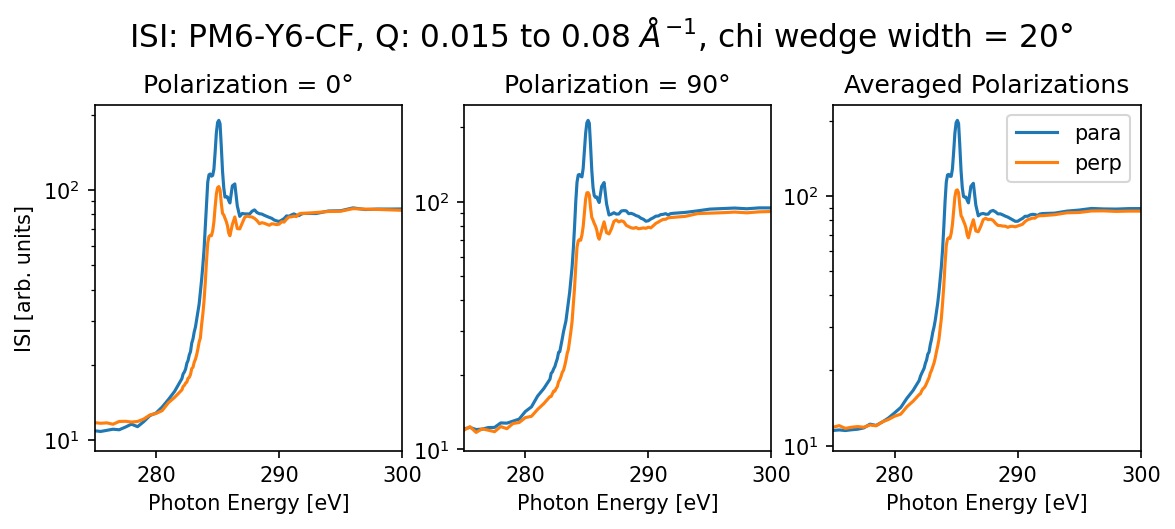

In [9]:
### Generate data
obj = andrew1
chi_width = 20
qrange=(1.5e-2, 8e-2)
# qrange=(2e-3, 8e-3)

para_isi_pol, perp_isi_pol, para_isi_avg, perp_isi_avg = obj.isi(chi_width=chi_width, saxswaxs='waxs', qrange=qrange)


### Plot data
fig, (ax00, ax90, axavg) = plt.subplots(1, 3)
fig.set(size_inches=(9,3), dpi=150)
angstring = '$Å^{-1}$'
fig.suptitle(f'ISI: {obj.blend_name}, Q: {qrange[0]} to {qrange[1]} {angstring}, chi wedge width = {chi_width}°', fontsize=15, y=1.08)

para_isi_pol[0].plot.line(ax=ax00, yscale='log', xlim=(275, 300), label=f'para')
perp_isi_pol[0].plot.line(ax=ax00, yscale='log', xlim=(275, 300), label=f'perp')
ax00.set(ylabel='ISI [arb. units]', xlabel='Photon Energy [eV]', title='Polarization = 0°')

para_isi_pol[90].plot.line(ax=ax90, yscale='log', xlim=(275, 300), label=f'para')
perp_isi_pol[90].plot.line(ax=ax90, yscale='log', xlim=(275, 300), label=f'perp')
ax90.set(xlabel='Photon Energy [eV]', title='Polarization = 90°')

para_isi_avg.plot.line(ax=axavg, yscale='log', xlim=(275, 300), label=f'para')
perp_isi_avg.plot.line(ax=axavg, yscale='log', xlim=(275, 300), label=f'perp')
axavg.set(xlabel='Photon Energy [eV]', title='Averaged Polarizations')
# axavg.set_xticks([278, 285.1, 292, 300])
plt.legend()
plt.show()

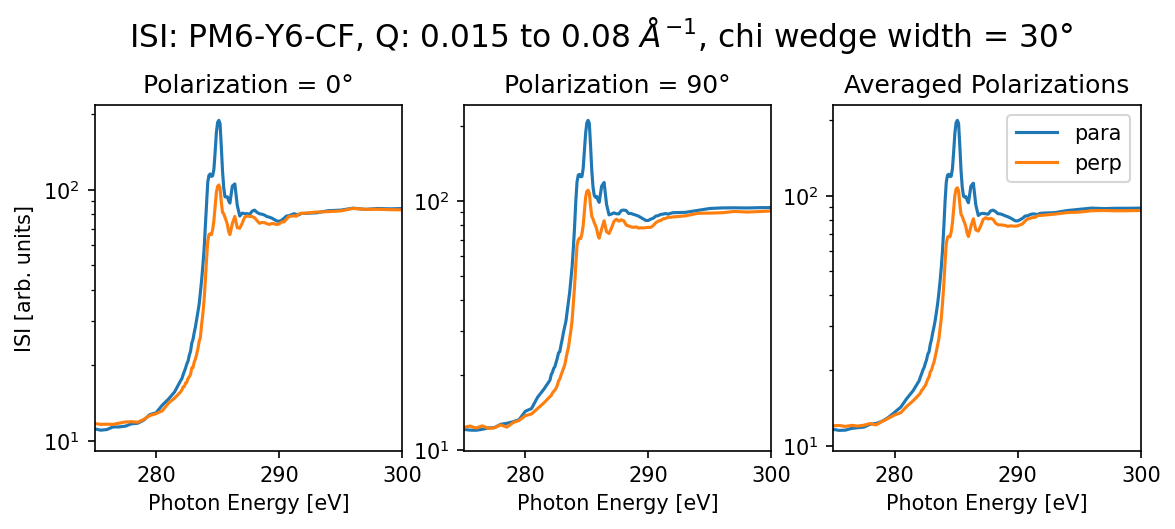

In [8]:
### Generate data
obj = andrew1
chi_width = 30
saxswaxs='waxs'
qrange=(1.5e-2, 8e-2)
# qrange=(2e-3, 8e-3)

para_isi_pol, perp_isi_pol, para_isi_avg, perp_isi_avg = obj.isi(chi_width=chi_width, saxswaxs=saxswaxs, qrange=qrange)


### Plot data
fig, (ax00, ax90, axavg) = plt.subplots(1, 3)
fig.set(size_inches=(9,3), dpi=150)
angstring = '$Å^{-1}$'
fig.suptitle(f'ISI: {obj.blend_name}, Q: {qrange[0]} to {qrange[1]} {angstring}, chi wedge width = {chi_width}°', fontsize=15, y=1.08)

para_isi_pol[0].plot.line(ax=ax00, yscale='log', xlim=(275, 300), label=f'para')
perp_isi_pol[0].plot.line(ax=ax00, yscale='log', xlim=(275, 300), label=f'perp')
ax00.set(ylabel='ISI [arb. units]', xlabel='Photon Energy [eV]', title='Polarization = 0°')

para_isi_pol[90].plot.line(ax=ax90, yscale='log', xlim=(275, 300), label=f'para')
perp_isi_pol[90].plot.line(ax=ax90, yscale='log', xlim=(275, 300), label=f'perp')
ax90.set(xlabel='Photon Energy [eV]', title='Polarization = 90°')

para_isi_avg.plot.line(ax=axavg, yscale='log', xlim=(275, 300), label=f'para')
perp_isi_avg.plot.line(ax=axavg, yscale='log', xlim=(275, 300), label=f'perp')
axavg.set(xlabel='Photon Energy [eV]', title='Averaged Polarizations')
# axavg.set_xticks([278, 285.1, 292, 300])
plt.legend()
plt.show()

### 3. 2D Intensity Maps
    - Chi-meaned and Q-meaned

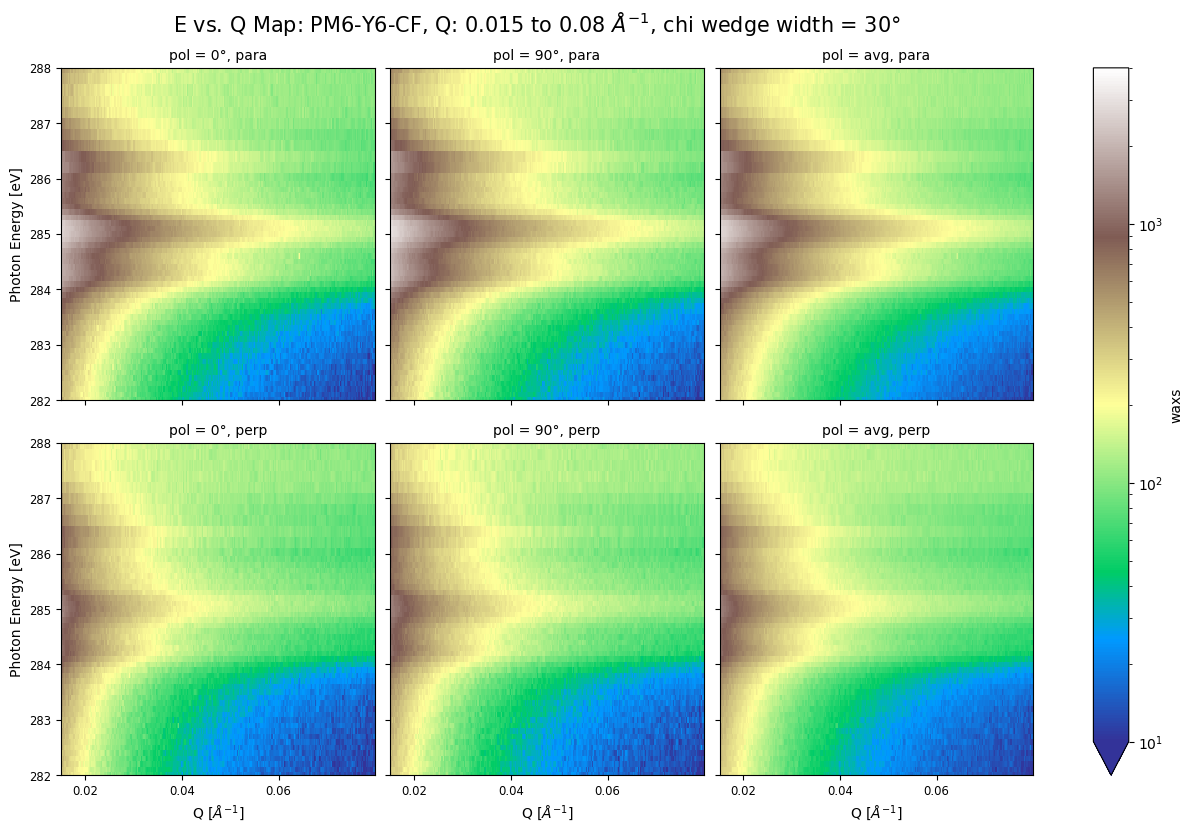

In [12]:
### Generate chi-meaned EvsQ Data
obj = andrew1
chi_width = 30
saxswaxs = 'waxs'
qrange=(1.5e-2, 8e-2)  # WAXS good full range
# qrange=(2e-3, 8e-3)  # SAXS good full range

para_EvsQ_pol, perp_EvsQ_pol, para_EvsQ_avg, perp_EvsQ_avg = obj.e_map(saxswaxs=saxswaxs, chi_width=chi_width, qrange=qrange)

### Plotting, xarray way using facetgrids

# First reassign polarization coordinate value to a unique name for the pol/orientation pair
para_EvsQ_pol[0] = para_EvsQ_pol[0].assign_coords({'pol': '0°, para'})
para_EvsQ_pol[90] = para_EvsQ_pol[90].assign_coords({'pol': '90°, para'})
perp_EvsQ_pol[0] = perp_EvsQ_pol[0].assign_coords({'pol': '0°, perp'})
perp_EvsQ_pol[90] = perp_EvsQ_pol[90].assign_coords({'pol': '90°, perp'})
para_EvsQ_avg = para_EvsQ_avg.assign_coords({'pol': 'avg, para'})
perp_EvsQ_avg = perp_EvsQ_avg.assign_coords({'pol': 'avg, perp'})

# Combine all dataarrays into one "stacked" dataarray along the reassigned pol dimension
stacked = xr.concat((para_EvsQ_pol[0], para_EvsQ_pol[90], para_EvsQ_avg, perp_EvsQ_pol[0], perp_EvsQ_pol[90], perp_EvsQ_avg), dim='pol')

# Generate and customize facetgrid plot
fg = stacked.plot(y='energy', ylim=(282, 288), norm=LogNorm(1e1, 4e3), cmap=cm, col='pol', col_wrap=3, size=4)
fg.fig.suptitle(f'E vs. Q Map: {obj.blend_name}, Q: {qrange[0]} to {qrange[1]} {angstring}, chi wedge width = {chi_width}°', fontsize=15, y=1.03, x=0.42)
fg.set_xlabels('Q [$Å^{-1}$]')
fg.set_ylabels('Photon Energy [eV]')
fg.set_ticks(max_xticks=4, max_yticks=6)

In [14]:
from andrew_loaded_rsoxs import *
%autoreload

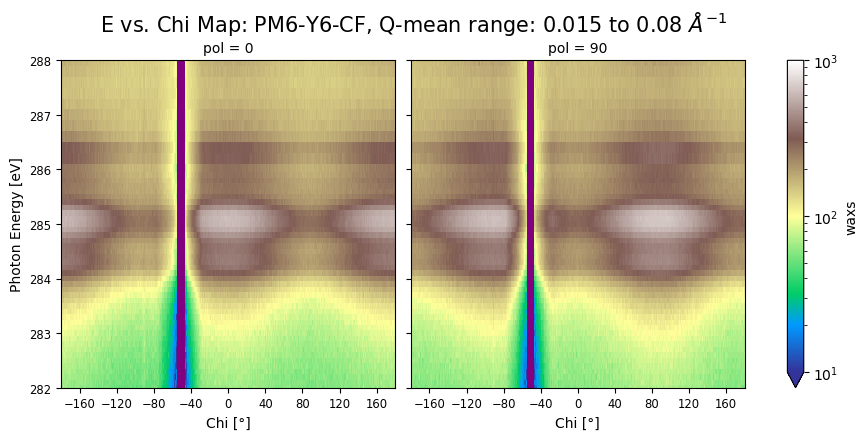

In [14]:
### Generate EvsChi Data
obj = andrew1
saxswaxs = 'waxs'
qrange=(1.5e-2, 8e-2)  # WAXS good full range
# qrange=(2e-3, 8e-3)  # SAXS good full range

qmeaned_EvsQ_pol = obj.e_map(axis_meaned='q', qrange=qrange, saxswaxs=saxswaxs)


### Plot data
stack = xr.concat((qmeaned_EvsQ_pol[0], qmeaned_EvsQ_pol[90]), dim='pol')
fg = stack.plot(ylim=(282, 288), norm=LogNorm(1e1, 1e3), cmap=cm, col='pol', size=4.2)
fg.fig.suptitle(f'E vs. Chi Map: {obj.blend_name}, Q-mean range: {qrange[0]} to {qrange[1]} {angstring}', y=1.04, x=0.45, fontsize=15)
fg.fig.set(dpi=100)
fg.set_xlabels('Chi [°]')
fg.set_ylabels('Photon Energy [eV]')
fg.set_ticks(max_xticks=10, max_yticks=6)

### 4. Meaned 1D intensity lineplots, selected energies

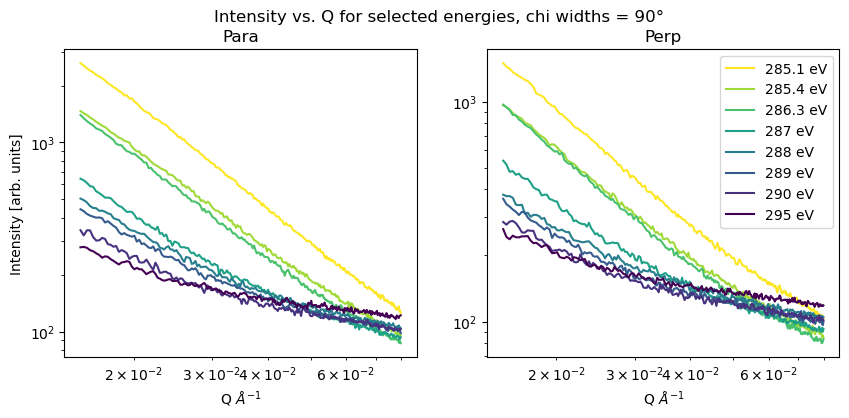

In [41]:
### Generate chi-meaned EvsQ Data
obj = andrew1
chi_width = 90
saxswaxs = 'waxs'
qrange=(1.5e-2, 8e-2)  # WAXS good full range
# qrange=(2e-3, 8e-3)  # SAXS good full range

para_EvsQ_pol, perp_EvsQ_pol, para_EvsQ_avg, perp_EvsQ_avg = obj.e_map(chi_width=chi_width, saxswaxs=saxswaxs, qrange=qrange)


### Plotting
# energies = [275, 280, 283, 285.1, 286.3, 300, 340]
energies = [285.1, 285.4, 286.3, 287, 288, 289, 290, 295]
fig, (ax_para, ax_perp) = plt.subplots(1,2)
fig.set(size_inches=(10,4))
fig.suptitle(f'Intensity vs. Q for selected energies, chi widths = {chi_width}°')
hue = plt.cm.viridis_r(np.linspace(0, 1, len(energies)))
for i, energy in enumerate(energies):
    para_EvsQ_avg.sel(energy=energy, method='nearest').plot.line(
        ax=ax_para, xscale='log', yscale='log', color=hue[i], label=f'{energy} eV')
    perp_EvsQ_avg.sel(energy=energy, method='nearest').plot.line(
        ax=ax_perp, xscale='log', yscale='log', color=hue[i], label=f'{energy} eV')

    
ax_perp.legend()
ax_para.set(title='Para', ylabel='Intensity [arb. units]', xlabel='Q $Å^{-1}$')
ax_perp.set(title='Perp', ylabel=None, xlabel='Q $Å^{-1}$')

plt.show()

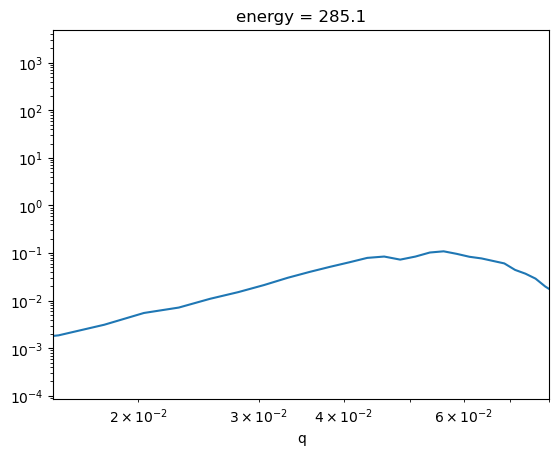

In [42]:
remeshed.sel(energy=285.1).mean('chi').plot.line(
    yscale='log', xscale='log', xlim=qrange)

In [83]:
plt.close('all')

## Anisotropy Ratio Plots

In [186]:
from andrew_loaded_rsoxs import *
%autoreload

### 1. 2D AR Maps

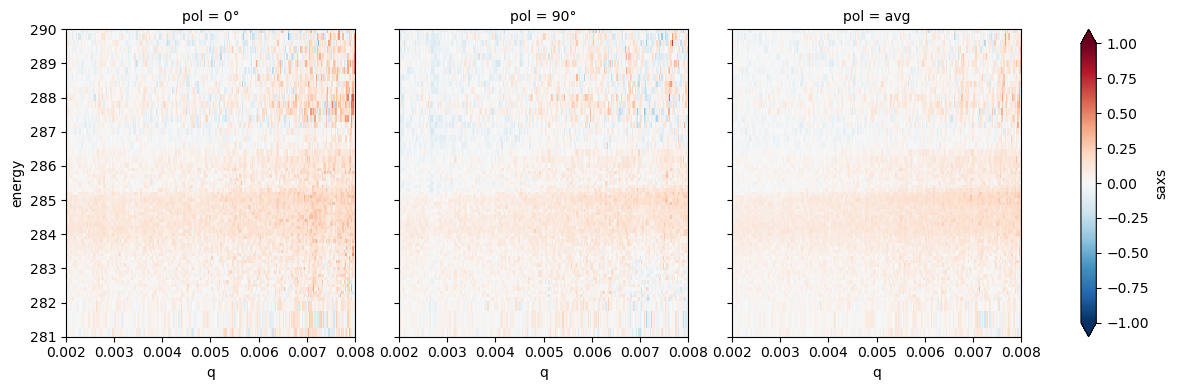

In [22]:
### Generate AR data:
obj = andrew1
chi_width = 30
saxswaxs='saxs'
# qrange=(1.5e-2, 8e-2)  # WAXS good full range
qrange=(2e-3, 8e-3)  # SAXS good full range

ARvsQ_pol, ARvsQ_avg = obj.ar_map(chi_width=30, saxswaxs=saxswaxs, qrange=qrange)

### Plotting
ar_cm = plt.cm.RdBu_r

ARvsQ_pol[0] = ARvsQ_pol[0].assign_coords({'pol': '0°'})
ARvsQ_pol[90] = ARvsQ_pol[90].assign_coords({'pol': '90°'})
ARvsQ_avg = ARvsQ_avg.assign_coords({'pol':'avg'})

stack = xr.concat((ARvsQ_pol[0], ARvsQ_pol[90], ARvsQ_avg), dim='pol')
stack.plot(y='energy', ylim=(281, 290), xlim=qrange, cmap=ar_cm, vmin=-1, vmax=1, col='pol', col_wrap=3, size=4)

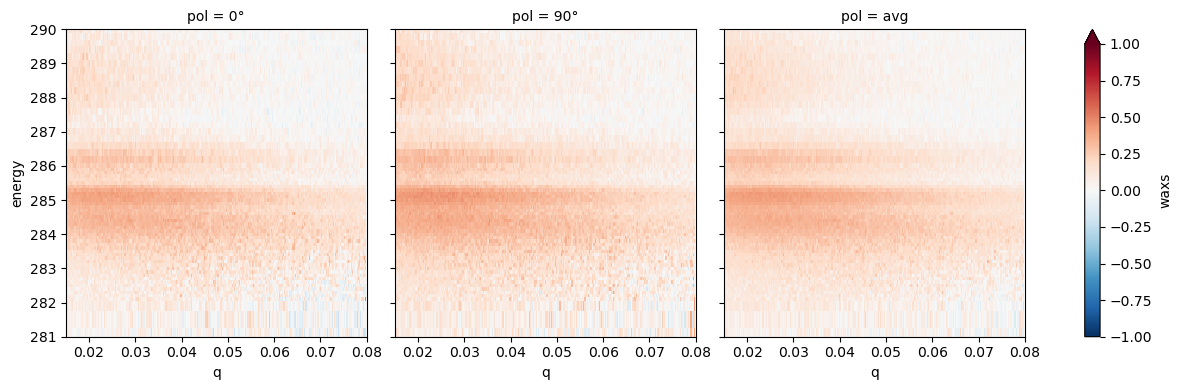

In [29]:
### Generate AR data:
obj = andrew1
chi_width = 30
saxswaxs='waxs'
qrange=(1.5e-2, 8e-2)  # WAXS good full range
# qrange=(2e-3, 8e-3)  # SAXS good full range

ARvsQ_pol, ARvsQ_avg = obj.ar_map(chi_width=30, saxswaxs=saxswaxs, qrange=qrange)

### Plotting
ar_cm = plt.cm.RdBu_r

ARvsQ_pol[0] = ARvsQ_pol[0].assign_coords({'pol': '0°'})
ARvsQ_pol[90] = ARvsQ_pol[90].assign_coords({'pol': '90°'})
ARvsQ_avg = ARvsQ_avg.assign_coords({'pol':'avg'})

stack = xr.concat((ARvsQ_pol[0], ARvsQ_pol[90], ARvsQ_avg), dim='pol')
stack.plot(y='energy', ylim=(281, 290), xlim=qrange, cmap=ar_cm, vmin=-1, vmax=1, col='pol', col_wrap=3, size=4)

### 2. 1D AR Maps

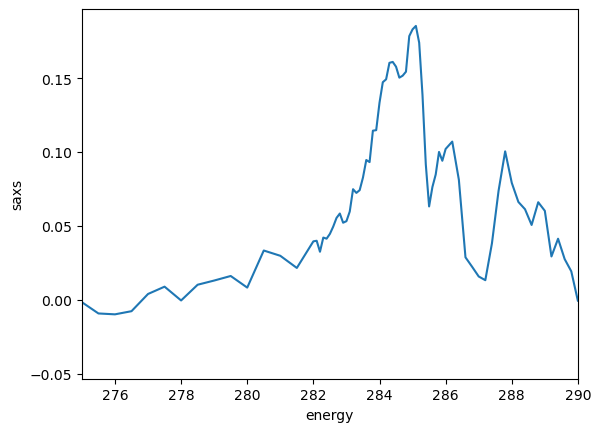

In [33]:
### Generate AR data:
obj = andrew1
chi_width = 30
saxswaxs='saxs'
# qrange=(1.5e-2, 8e-2)  # WAXS good full range
qrange=(2e-3, 8e-3)  # SAXS good full range

ARvsQ_pol, ARvsQ_avg = obj.ar_map(chi_width=chi_width, saxswaxs=saxswaxs, qrange=qrange)

### Plotting
ARvsQ_avg.sel(q=slice(6e-3, 8e-3)).mean('q').plot.line(xlim=(275, 290))
# ARvsQ_avg.mean('q').plot.line(xlim=(275, 290))

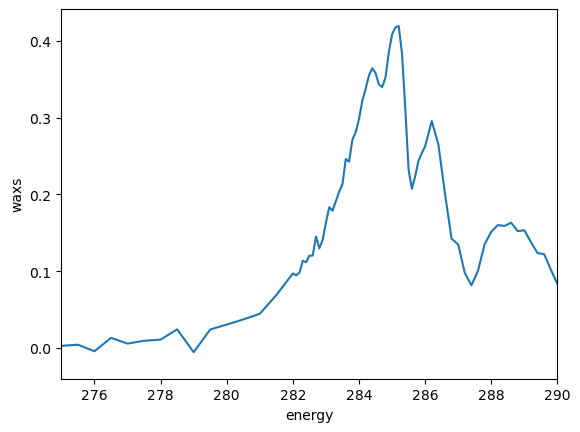

In [30]:
### Generate AR data:
obj = andrew1
chi_width = 30
saxswaxs='waxs'
qrange=(1.5e-2, 8e-2)  # WAXS good full range
# qrange=(2e-3, 8e-3)  # SAXS good full range

ARvsQ_pol, ARvsQ_avg = obj.ar_map(chi_width=chi_width, saxswaxs=saxswaxs, qrange=qrange)

### Plotting
ARvsQ_avg.sel(q=slice(2e-2, 3e-2)).mean('q').plot.line(xlim=(275, 290))
# ARvsQ_avg.mean('q').plot.line(xlim=(275, 290))

## Incorporating simulation output

In [15]:
import h5py

In [16]:
simsPath = propPath.joinpath('sim_datasets')

In [17]:
simPath = simsPath.joinpath('350x350pix_500x500size_500steps_D1_a1_epsilon1')
h5path = simPath.joinpath('HDF5')
h5list = sorted(h5path.glob('E*h5'))

In [18]:
def print_key(f, key):
    try:
        keys2 = f[key].keys()
        for key2 in keys2:
            new_key = key + '/' + key2
            print_key(f, new_key)
    except AttributeError:
        print(key)

with h5py.File(h5list[0],'r') as f:
    for key in f.keys():
        print_key(f, key)

K0/projection
KIDList/KVec


#### The scattering pattern is contained within 'K0/projection.' If you simulated multiple incident angles there would be additional 'K#' keys. KIDList contains the vector values for each of the incident angles (propagation direction).

#### Instantiate the PyHyperScattering loader and integrator

In [19]:
load = phs.load.cyrsoxsLoader(use_chunked_loading=True)
integ = phs.integrate.WPIntegrator(force_np_backend=True) # avoiding gpu backend for this tutorial

In [21]:
raw = load.loadDirectory(simPath)

/nsls2/users/alevin/repos/pyhyper_toneygroup_fork/PyHyperScattering/src/PyHyperScattering/cyrsoxsLoader.py:118: UserWarning: No morphology file found. Using default PhysSize of 5 nm.
  warnings.warn('No morphology file found. Using default PhysSize of 5 nm.')


Finished reading 250 energies. Time required: 0:00:00.672759


In [22]:
raw

<xarray.DataArray 'stack-58a3c92ed467b19bfed6b49e4ba76579' (qx: 350, qy: 350,
                                                            energy: 250)>
dask.array<stack, shape=(350, 350, 250), dtype=float32, chunksize=(350, 350, 1), chunktype=numpy.ndarray>
Coordinates:
  * qx       (qx) float64 -0.6283 -0.6247 -0.6211 ... 0.6175 0.6211 0.6247
  * qy       (qy) float64 -0.6283 -0.6247 -0.6211 ... 0.6175 0.6211 0.6247
  * energy   (energy) float64 275.0 275.1 275.2 275.3 ... 299.7 299.8 299.9
Attributes:
    CaseType:             0
    Energies:             [275.  275.1 275.2 275.3 275.4 275.5 275.6 275.7 27...
    EAngleRotation:       [0.0, 1.0, 360.0]
    MorphologyType:       0
    AlgorithmType:        0
    NumThreads:           4
    DumpMorphology:       False
    ScatterApproach:      0
    WindowingType:        0
    RotMask:              True
    EwaldsInterpolation:  1
    filehandles:          [<HDF5 file "Energy_275.00.h5" (mode r)>, <HDF5 fil...

In [23]:
remeshed = integ.integrateImageStack(raw)

  0%|          | 0/250 [00:00<?, ?it/s]

In [25]:
c = cm.jet(np.linspace(0,1,len(remeshed)))

AttributeError: 'LinearSegmentedColormap' object has no attribute 'jet'

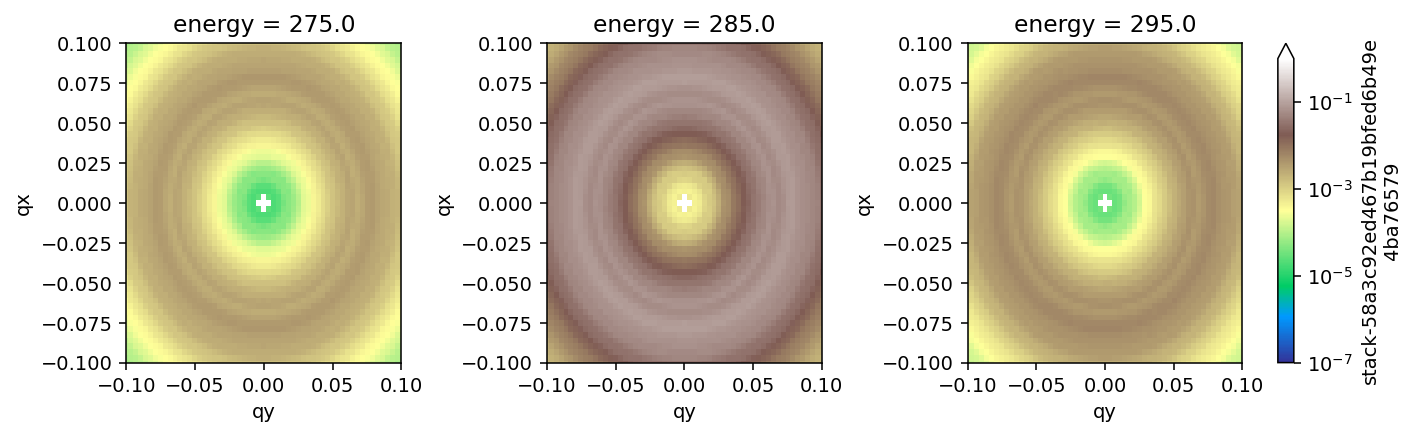

In [27]:
fig, ax = plt.subplots(1,3,figsize=(10,3),dpi=140,constrained_layout=True)
raw.sel(energy=275).plot(norm=LogNorm(1e-7,1),cmap='terrain',ax=ax[0],add_colorbar=False)
raw.sel(energy=285).plot(norm=LogNorm(1e-7,1),cmap='terrain',ax=ax[1],add_colorbar=False)
raw.sel(energy=295).plot(norm=LogNorm(1e-7,1),cmap='terrain',ax=ax[2])

[{axes.set_xlim(-0.1,0.1),axes.set_ylim(-0.1,0.1)} for axes in ax]
plt.show()